<a href="https://colab.research.google.com/github/vishxm/ML-basic/blob/main/PredictionUsingSupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction using Supervised Machine Learning Algorithm

## Done by [Vishwas Modhera](https://www.linkedin.com/in/vishwas-modhera-a9b292162/) 

Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Importing the dataset from where it is hosted using its URL

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv", header=0)

Printing first few lines, its shape and describing the distribution of values in it

In [ ]:
print(df.head(), "\n\n",df.shape,"\n\n", df.describe())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30 

 (25, 2) 

            Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


We need implement Linear Regression now using Ordinary Least Squares Method.

![The Equations](https://miro.medium.com/max/203/1*O2xXpYS7A3VlLXqT6SNMLg.png)

Model preparation

In [ ]:
X = df['Hours'].values
y = df['Scores'].values

In [ ]:
X_mean = X.mean()
y_mean = y.mean()

In [ ]:
n = df.shape[0]

In [ ]:
num = 0
den = 0

for i in range(n):
    num += (X[i] - X_mean)*(y[i] - y_mean)
    den += (X[i] - x_mean)**2

In [ ]:
b1 = num/den
b0 = y_mean - (b1 * X_mean)

In [ ]:
print(b1, b0)

9.775803390787475 2.4836734053731746


These are our parameters for the regression line.

Model Prediction

In [ ]:
y_pred = [b0 + b1*i for i in X]

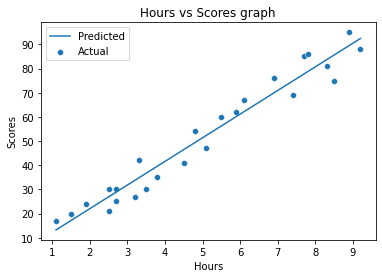

In [ ]:
sns.lineplot(x=X, y=y_pred, label='Predicted')
sns.scatterplot(x=X, y=y, label='Actual')
plt.title('Hours vs Scores graph')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

Now suppose if a student spent 9.25 hours a day studying, the score obtained will be given by b0 + b1*9.25

In [ ]:
print(f'The score obtained when spent 9.25 hours a day studying is {b0 + b1*9.25}')

The score obtained when spent 9.25 hours a day studying is 92.90985477015732


Now lets implement LinearRegression from sklearn

Model training

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = X.reshape(-1,1)
y = y.reshape(-1,1)
lr = lr.fit(X, y)

Model Prediction

In [ ]:
lr.predict(np.array([9.25]).reshape(-1,1))

array([[92.90985477]])

This is very close to what we found out by implementing the equation.

Now let's find out the accuracy of both the models by splitting the dataset available to us.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [ ]:
from sklearn import metrics

print("MSE for sklearn trained model : ", metrics.mean_absolute_error(y_test, y_pred))

MSE for sklearn trained model :  4.377462016223005


In [ ]:
manual_y_pred = [b0 + b1*i for i in X_test]
print("MSE for manually trained model : ", metrics.mean_absolute_error(y_test, manual_y_pred))

MSE for manually trained model :  3.7976145292576957


Wow, so manually trained model (coefficients) were more accurate. Generally, sklearn model is accurate when more data is present.  